# Experiment 7: Implement Support Vector Machine by using Iris Dataset

In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the iris dataset
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [18]:
# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [20]:
# Display the first few rows of the dataset
print("Iris Dataset Head:")
print(df.head())

Iris Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [22]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

In [24]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [26]:
# Create an SVM model with a linear kernel
svm_model = SVC(kernel='linear')

In [28]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)

In [32]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [34]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [36]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[17  0  0]
 [ 0 17  0]
 [ 0  0 11]]


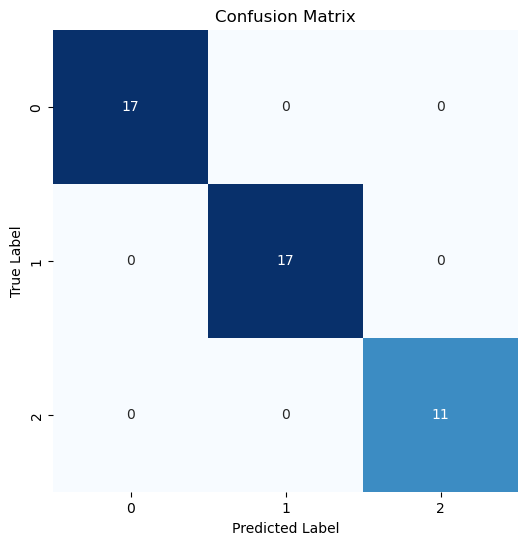

In [38]:
# Visualizing the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

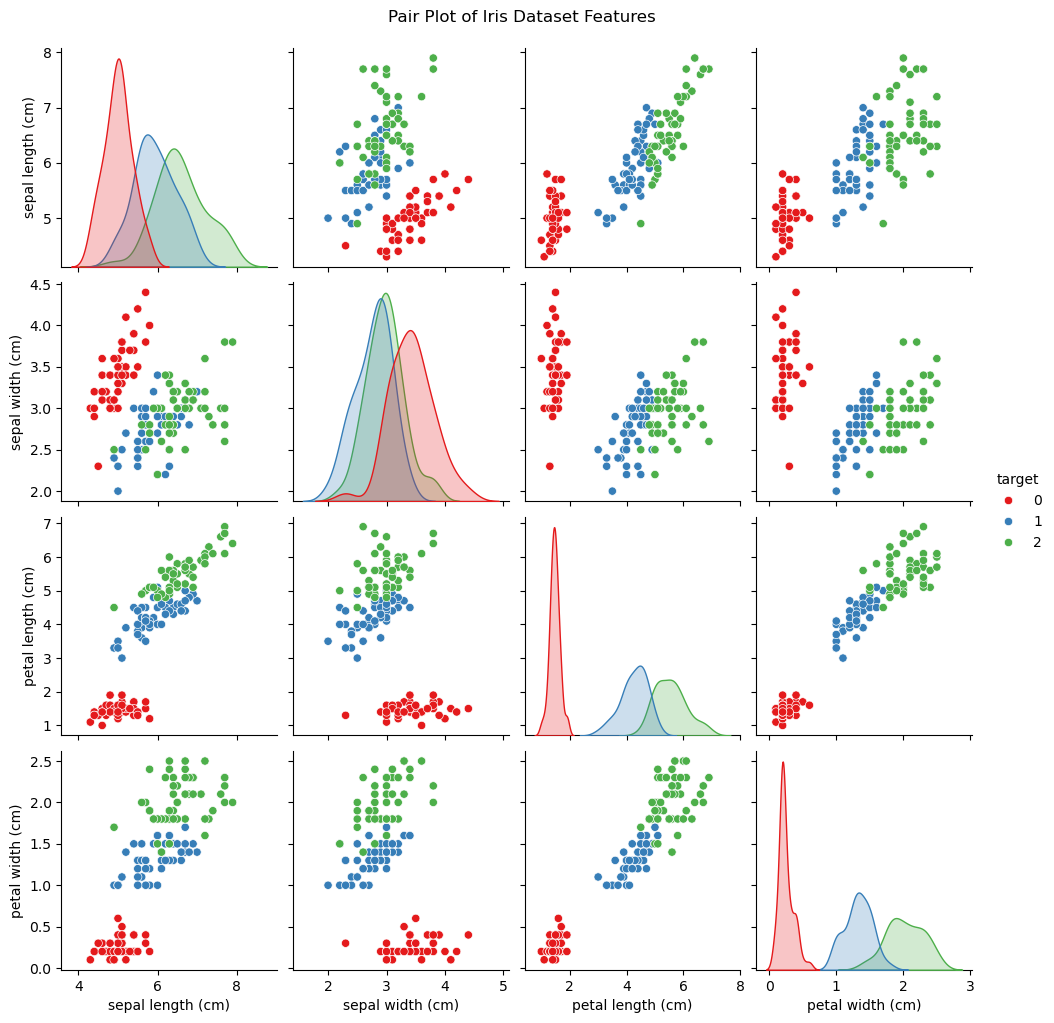

In [67]:
# Pair Plot of Features
sns.pairplot(df, hue="target", palette="Set1", diag_kind="kde")
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()